In [1]:
# Data Preparation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('/Users/amber/Desktop/cs455_homework_4_casey_lacey_dataset.csv')

In [4]:
# Verify the column names
print(df.columns)

Index(['Purchase Amount', 'Previous Purchases', 'Review Rating',
       'Class Label'],
      dtype='object')


In [5]:
# Example: Use the median of 'Review Rating' to create class labels 'A' and 'B'
median_value = df['Review Rating'].median()
df['class_label'] = df['Review Rating'].apply(lambda x: 'A' if x <= median_value else 'B')

In [6]:
# Normalize two columns to integers in the range [0, 100]
df['normalized_purchase_amount'] = (df['Purchase Amount'] - df['Purchase Amount'].min()) * 100 / (df['Purchase Amount'].max() - df['Purchase Amount'].min())
df['normalized_previous_purchases'] = (df['Previous Purchases'] - df['Previous Purchases'].min()) * 100 / (df['Previous Purchases'].max() - df['Previous Purchases'].min())

In [7]:
# Split the data into training (50%) and test (50%) sets
train_df, test_df = train_test_split(df, stratify=df['class_label'], test_size=0.5, random_state=42)

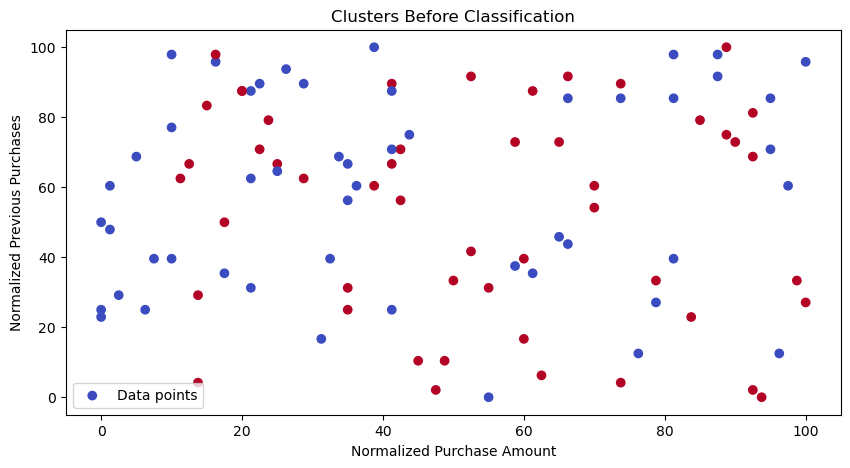

In [8]:
# Visualize the clusters before classification
plt.figure(figsize=(10, 5))
plt.scatter(df['normalized_purchase_amount'], df['normalized_previous_purchases'], c=df['class_label'].apply(lambda x: 0 if x == 'A' else 1), cmap='coolwarm', label='Data points')
plt.title('Clusters Before Classification')
plt.xlabel('Normalized Purchase Amount')
plt.ylabel('Normalized Previous Purchases')
plt.legend()
plt.show()

In [9]:
# Save the prepared dataset locally
df.to_csv('/Users/amber/Desktop/cs455_homework_4_casey_lacey_dataset.csv', index=False)

In [10]:
# KNN Classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Features and labels
X_train = train_df[['normalized_purchase_amount', 'normalized_previous_purchases']]
y_train = train_df['class_label']
X_test = test_df[['normalized_purchase_amount', 'normalized_previous_purchases']]
y_test = test_df['class_label']

In [13]:
# KNN with K=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred_knn1 = knn1.predict(X_test)
accuracy_knn1 = accuracy_score(y_test, y_pred_knn1)

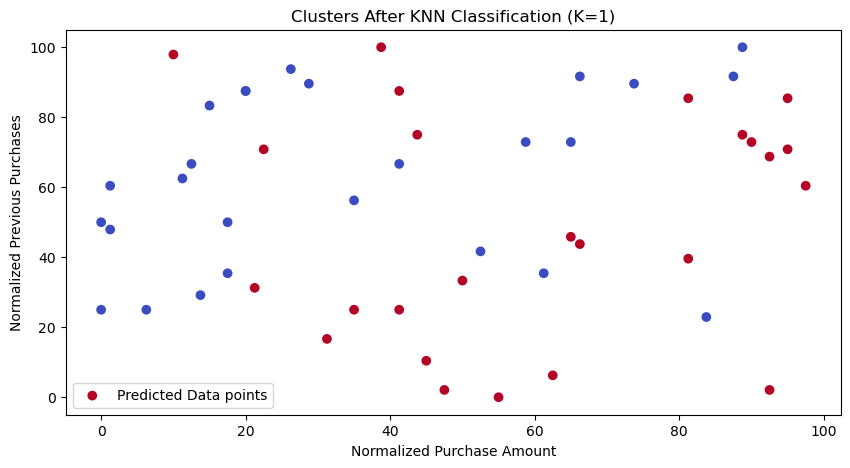

In [14]:
# Visualize the clusters after KNN classification (K=1)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['normalized_purchase_amount'], X_test['normalized_previous_purchases'], c=[0 if label == 'A' else 1 for label in y_pred_knn1], cmap='coolwarm', label='Predicted Data points')
plt.title('Clusters After KNN Classification (K=1)')
plt.xlabel('Normalized Purchase Amount')
plt.ylabel('Normalized Previous Purchases')
plt.legend()
plt.show()

In [15]:
# Print results
print(f'KNN (K=1) Accuracy: {accuracy_knn1 * 100:.2f}%')

KNN (K=1) Accuracy: 41.18%


In [16]:
# KNN with K=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_knn5 = knn5.predict(X_test)
accuracy_knn5 = accuracy_score(y_test, y_pred_knn5)


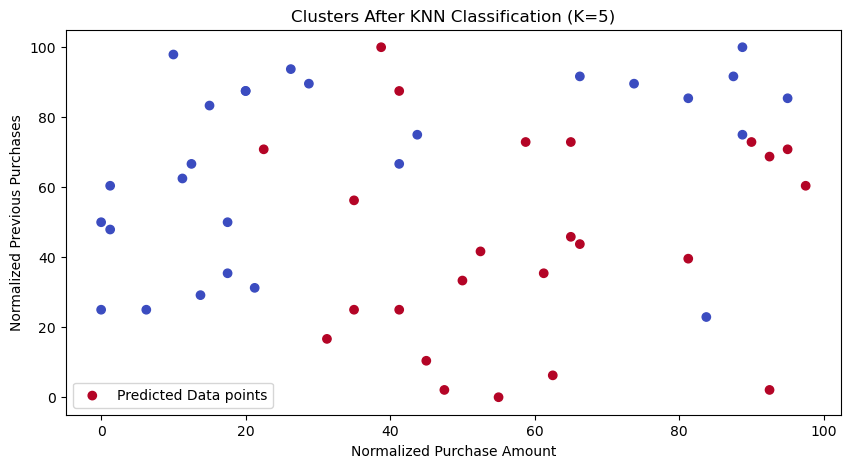

In [17]:
# Visualize the clusters after KNN classification (K=5)
plt.figure(figsize=(10, 5))
plt.scatter(X_test['normalized_purchase_amount'], X_test['normalized_previous_purchases'], c=[0 if label == 'A' else 1 for label in y_pred_knn5], cmap='coolwarm', label='Predicted Data points')
plt.title('Clusters After KNN Classification (K=5)')
plt.xlabel('Normalized Purchase Amount')
plt.ylabel('Normalized Previous Purchases')
plt.legend()
plt.show()

In [18]:
# Print results
print(f'KNN (K=5) Accuracy: {accuracy_knn5 * 100:.2f}%')

KNN (K=5) Accuracy: 50.98%


In [19]:
# Decision Tree Classification

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

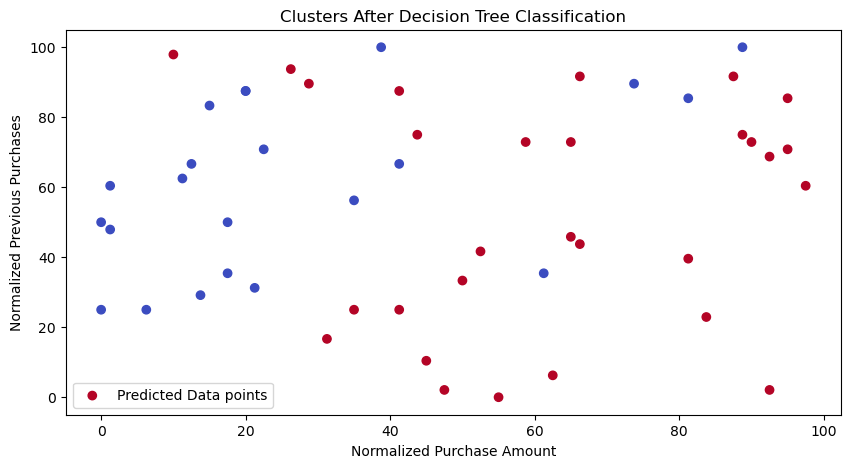

In [22]:
# Visualize the clusters after Decision Tree classification
plt.figure(figsize=(10, 5))
plt.scatter(X_test['normalized_purchase_amount'], X_test['normalized_previous_purchases'], c=[0 if label == 'A' else 1 for label in y_pred_dt], cmap='coolwarm', label='Predicted Data points')
plt.title('Clusters After Decision Tree Classification')
plt.xlabel('Normalized Purchase Amount')
plt.ylabel('Normalized Previous Purchases')
plt.legend()
plt.show()

In [28]:
# Print results
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')

Decision Tree Accuracy: 49.02%


In [29]:
performance_comparison = """
KNN (K=1) Accuracy: 41.18%
KNN (K=5) Accuracy: 50.98%
Decision Tree Accuracy: 49.02%

The classifier with the best performance is KNN with K=5, which has an accuracy of 50.98%.

KNN with K=5 most likely outperformed the other models because it strikes a balance between capturing 
the local structure of the data and reducing the effects of noise. 
With K=1, the model is sensitive to noise and outliers, which can lead to overfitting and poor 
generalization on the test set. By increasing K to 5, the classifier considers a larger neighborhood 
of points, which helps smooth out the predictions and results in better accuracy.

The decision tree performed slightly worse than KNN with K=5. This could be due to the decision tree's 
tendency to overfit the training data, especially if the depth of the tree is not controlled. While 
decision trees are powerful and can model complex relationships, they can also become too tailored to 
the training data, which reduces their effectiveness on unseen data.
"""

# Save the answer to a text file for inclusion in the report
with open('/Users/amber/Desktop/cs455_homework_4_lastname_job_interview_answer.txt', 'w') as file:
    file.write(performance_comparison)

In [30]:
job_interview_answer = """
Prepping the Data:
In a recent project for my coursework, I worked with data classification using a couple of Machine Learning algorithms, including K-Nearest Neighbors (KNN) and a Decision Tree. The project involved classifying customer data based on their purchase behavior and review ratings. 
The first step was to prepare the dataset, which included columns 'Purchase Amount', 'Previous Purchases', 'Review Rating', and a 'Class Label'. The 'Review Rating' column was used to create class labels 'A' and 'B' based on the median value, which helped distinguish between different customer segments.
Normalization was next in the preprocessing stage. I normalized the 'Purchase Amount' and 'Previous Purchases' columns to a range of [0, 100]. This step ensures that the features contribute equally to the distance calculations in KNN.
The dataset was then split into training and test sets, with 50% of the data allocated to each. This stratified split ensured that both training and test sets had a balanced representation of class labels, which is important for evaluation of the model's performance.
Model Training:
I implemented KNN with two different values of K: 1 and 5. For K=1, the algorithm looks at the nearest neighbor to classify a data point. This method is sensitive to noise in the data, as seen in the accuracy result of 41.18%. Increasing K to 5 improved the accuracy to 50.98%, showing better performance. The K=5 classifier averages the labels of the 5 nearest neighbors, which helps stem the impact of outliers and noise, resulting in stronger predictions.
The Decision Tree classifier resulted in an accuracy of 49.02%. Decision Trees are powerful for capturing non-linear relationships but can overfit if not properly tuned. In this case, the Decision Tree performed slightly worse than KNN with K=5, possibly due to overfitting on the training data.
Visualization:
To understand the classifiers' performance better, I used scatter plots to show the clusters before and after classification. The scatter plots showed the distribution of the data points according to their normalized Purchase Amount and Previous Purchases. Before classification, the data points were colored based on their true labels. After classification, the points were colored based on the predicted labels from each model. These visualizations helped me see how well the classifiers distinguished between the two classes.
Conclusion
This hands-on project provided me with a better understanding of KNN and Decision Tree classification techniques. I learned about the strengths and weaknesses of each method. KNN, with a well-chosen K value, can provide strong results by averaging the influence of multiple neighbors, while Decision Trees require some careful tuning to avoid overfitting. I learned a lot about data preprocessing, model training, and evaluation.
"""

# Save the answer to a text file for inclusion in the report
with open('/Users/amber/Desktop/cs455_homework_4_lastname_job_interview_answer.txt', 'w') as file:
    file.write(job_interview_answer)